In [1]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

/home/djjin/anaconda3/envs/conda_visual_HPE/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_May__3_18:49:52_PDT_2022
Cuda compilation tools, release 11.7, V11.7.64
Build cuda_11.7.r11.7/compiler.31294372_0
torch:  1.13 ; cuda:  cu117
detectron2: 0.6


In [2]:
import os
import sys
import logging
import argparse
os.environ["DATASET"] = "../datasets"

pth = '/'.join(sys.path[0].split('/')[:-1])
sys.path.insert(0, pth)

from pprint import pprint
import numpy as np
np.random.seed(1)

home_dir = os.path.abspath(os.getcwd()+"/../")
sys.path.append(home_dir)
print(home_dir)

import warnings
warnings.filterwarnings(action='ignore')
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

from hdecoder.BaseModel import BaseModel
from hdecoder import build_model
from utils.distributed import init_distributed
from utils.arguments import load_opt_from_config_files, load_config_dict_to_opt

/home/djjin/Mygit/X-Decoder


Invalid MIT-MAGIC-COOKIE-1 key

In [3]:
from utils.arguments import load_vcoco_opt_command, load_vcoco_parser

cmdline_args = load_vcoco_parser()
cmdline_args.conf_files = [os.path.join(home_dir, "configs/hdecoder/vcoco.yaml")]
# cmdline_args.overrides = ['WEIGHT', 'true', 'RESUME_FROM', '../checkpoints/xdecoder_focalt_best_openseg.pt'] 
cmdline_args.overrides = ['DONT_LOAD_MODEL', 'false', 'PYLEARN_MODEL', '../data/output/test/00062100/default/raw_model_states.pt'] 

opt = load_vcoco_opt_command(cmdline_args)
opt = init_distributed(opt)

In [4]:
from datasets.build import build_train_dataloader
train_data_loader = build_train_dataloader(opt)
dataset_names = opt['DATASETS']['TRAIN']
print(len(train_data_loader))

INFO:datasets.build:Using training sampler TrainingSampler
INFO:detectron2.data.common:Serializing 5400 elements to byte tensors and concatenating them all ...
INFO:detectron2.data.common:Serialized dataset takes 4.09 MiB


Dataset length: 5400
2700


{'orig_size': tensor([640, 457]), 'size': tensor([985, 704]), 'boxes': tensor([[0.5326, 0.4787, 0.7545, 0.4851],
        [0.9422, 0.4468, 0.1157, 0.5124],
        [0.6910, 0.1355, 0.1935, 0.1337],
        [0.5173, 0.1644, 0.2334, 0.2523],
        [0.2512, 0.7978, 0.4459, 0.4045],
        [0.2429, 0.2050, 0.2471, 0.4071],
        [0.3030, 0.1917, 0.1664, 0.3834],
        [0.5582, 0.7298, 0.6223, 0.1116],
        [0.8274, 0.3900, 0.2104, 0.4488],
        [0.7696, 0.3166, 0.1840, 0.2439],
        [0.8527, 0.8580, 0.2946, 0.2840],
        [0.8076, 0.1870, 0.0849, 0.0554],
        [0.9125, 0.4322, 0.1618, 0.4702],
        [0.0534, 0.2004, 0.1068, 0.2975],
        [0.3720, 0.5016, 0.7440, 0.9937]]), 'labels': tensor([ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0]), 'iscrowd': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'area': tensor([253811.2188,  41103.2930,  17942.7012,  40831.2891, 125064.6719,
         69769.9141,  44243.6680,  48165.7031,  65470.6797,  31127.156

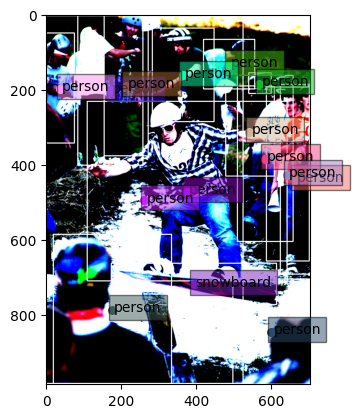

{'orig_size': tensor([480, 640]), 'size': tensor([640, 853]), 'boxes': tensor([[0.6666, 0.6607, 0.2545, 0.3056],
        [0.8490, 0.6301, 0.1680, 0.3375],
        [0.3555, 0.5402, 0.2591, 0.4240],
        [0.6921, 0.2689, 0.0773, 0.0865],
        [0.7756, 0.2868, 0.0442, 0.0763],
        [0.8592, 0.2351, 0.0933, 0.1935],
        [0.9201, 0.2105, 0.0782, 0.2629],
        [0.5325, 0.6342, 0.0441, 0.0450],
        [0.5019, 0.1399, 0.0639, 0.1216],
        [0.2761, 0.3145, 0.0459, 0.0681],
        [0.7181, 0.3801, 0.0778, 0.0391],
        [0.7180, 0.2907, 0.0123, 0.0409],
        [0.0877, 0.1761, 0.0133, 0.0292],
        [0.9831, 0.3378, 0.0142, 0.0208],
        [0.8895, 0.2371, 0.0422, 0.1682],
        [0.6180, 0.2174, 0.0803, 0.1536],
        [0.7354, 0.2928, 0.0122, 0.0404],
        [0.5541, 0.2204, 0.0760, 0.1029]]), 'labels': tensor([ 0,  0,  0,  0,  0,  0,  0, 35,  0, 34, 34, 39, 41, 41,  0,  0, 39,  0]), 'iscrowd': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'are

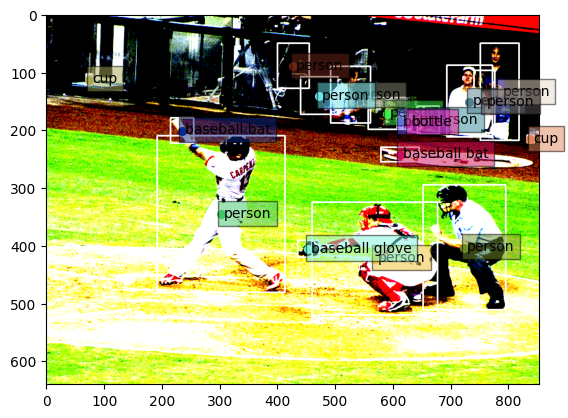

{'orig_size': tensor([427, 640]), 'size': tensor([640, 644]), 'boxes': tensor([[0.5543, 0.6260, 0.6256, 0.7479],
        [0.2431, 0.5977, 0.4863, 0.7929],
        [0.8669, 0.4113, 0.1289, 0.0947]]), 'labels': tensor([ 0,  0, 29]), 'iscrowd': tensor([0, 0, 0]), 'area': tensor([192844.0156, 158923.4062,   5032.3242]), 'filename': '../datasets/v-coco/images/train2014/COCO_train2014_000000469941.jpg', 'obj_labels': tensor([29, 80, 80,  0,  0]), 'verb_labels': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


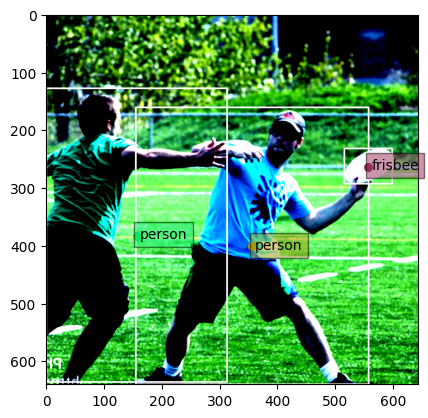

{'orig_size': tensor([427, 640]), 'size': tensor([672, 864]), 'boxes': tensor([[0.7810, 0.8412, 0.4380, 0.3176],
        [0.6384, 0.8604, 0.7231, 0.2791],
        [0.5382, 0.7069, 0.1941, 0.1691]]), 'labels': tensor([ 0, 59, 56]), 'iscrowd': tensor([0, 0, 0]), 'area': tensor([ 80774.2188, 117185.2344,  19059.8496]), 'filename': '../datasets/v-coco/images/train2014/COCO_train2014_000000376405.jpg', 'obj_labels': tensor([59]), 'verb_labels': tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 'sub_boxes': tensor([[0.7810, 0.8412, 0.4380, 0.3176]]), 'obj_boxes': tensor([[0.6384, 0.8604, 0.7231, 0.2791]]), 'matching_labels': tensor([1])}


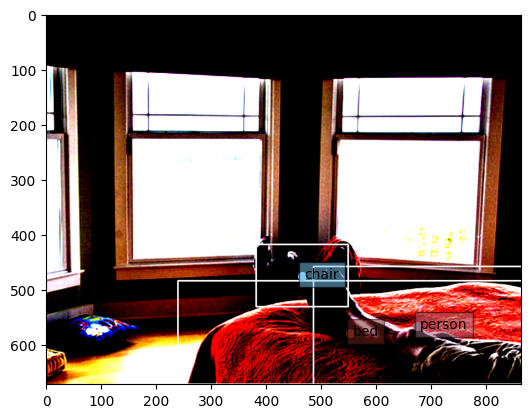

{'orig_size': tensor([425, 640]), 'size': tensor([552, 544]), 'boxes': tensor([[0.2768, 0.8876, 0.1653, 0.2081],
        [0.7059, 0.4965, 0.2884, 0.3062],
        [0.5000, 0.5024, 1.0000, 0.9953],
        [0.7040, 0.5024, 0.2885, 0.3125]]), 'labels': tensor([27, 40,  0, 41]), 'iscrowd': tensor([0, 0, 0, 0]), 'area': tensor([ 10325.3418,  26521.4277, 298869.1875,  27074.4805]), 'filename': '../datasets/v-coco/images/train2014/COCO_train2014_000000556306.jpg', 'obj_labels': tensor([40, 41, 80]), 'verb_labels': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 'sub_boxes': tensor([[0.5000, 0.5024, 1.0000, 0.9953],
        [0.5000, 0.5024,

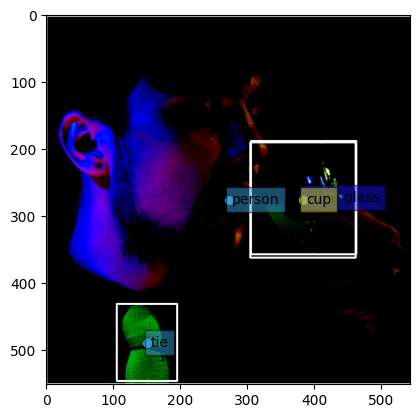

{'orig_size': tensor([640, 480]), 'size': tensor([512, 544]), 'boxes': tensor([[0.5845, 0.4391, 0.2927, 0.2279],
        [0.5000, 0.5000, 1.0000, 1.0000],
        [0.4187, 0.4309, 0.4385, 0.5174]]), 'labels': tensor([0, 7, 0]), 'iscrowd': tensor([0, 0, 0]), 'area': tensor([ 18583.9062, 278528.0000,  63185.6094]), 'filename': '../datasets/v-coco/images/train2014/COCO_train2014_000000095178.jpg', 'obj_labels': tensor([80,  7]), 'verb_labels': tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 'sub_boxes': tensor([[0.4187, 0.4309, 0.4385, 0.5174],
        [0.4187, 0.4309, 0.4385, 0.5174]]), 'obj_boxes': tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 1.0000, 1.0000]]), 'matching_labels': tensor([1, 1])}


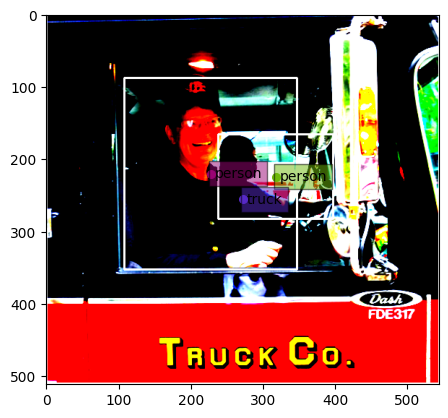

In [7]:
import cv2, random
from datasets.utils.vcoco_utils import valid_obj_ids, get_coco_instance_ID_to_name
from matplotlib import pyplot as plt
def random_color():
    rdn = random.randint(1, 1000)
    b = int(rdn * 997) % 255
    g = int(rdn * 4447) % 255
    r = int(rdn * 6563) % 255
    return b, g, r

with torch.no_grad():
    for idx, batches in enumerate(train_data_loader):
        if idx > 2:
            break
        for key, batch in batches.items():
            for test in batch:
                target_img = test["image"]
                # pixel_mean = torch.Tensor([123.675, 116.280, 103.530]).view(-1, 1, 1)
                # pixel_std = torch.Tensor([58.395, 57.120, 57.375]).view(-1, 1, 1)
                # target_img = (target_img - pixel_mean) / pixel_std
                target = test["instances"]
                print(target)
                img = target_img.permute(1, 2, 0).detach().cpu().numpy()
                hh, ww = img.shape[0], img.shape[1]
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

                obj_labels = []
                labels = []
                verb_names = []
                ob_boxes = []
                sub_boxes = []

                obj_boxes = target['boxes']
                for test in range(obj_boxes.shape[0]):
                    cx, cy, w, h = obj_boxes[test]
                    color = random_color()
                    cx, cy, w, h = cx * ww, cy * hh, w * ww, h * hh
                    n_box = list(map(int, [cx - 0.5 * w, cy - 0.5 * h, cx + 0.5 * w, cy + 0.5 * h]))
                    x1, y1, x2, y2 = n_box
                    ob_boxes.append(n_box)
                    
                for idx in target['labels']:
                    label_name = get_coco_instance_ID_to_name(valid_obj_ids[idx])
                    labels.append(label_name)

                for label, box in zip(labels, ob_boxes):
                    color = random_color()
                    x1, y1, x2, y2 = box
                    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

                    x = (x1 + x2) / 2
                    y = (y1 + y2) / 2

                    plt.scatter(x, y, 30, color=[i/255 for i in color])
                    plt.text(
                        x + 5,
                        y + 5,
                        label,
                        fontsize=10,
                        bbox=dict(facecolor=[i/255 for i in color], alpha=0.5),
                        )

                plt.imshow(img)
                plt.show()